In [1]:
!pip install fastai -q --upgrade

In [2]:
from fastai.vision.all import *
from pathlib import Path
from fastcore.xtras import Path # @patched Pathlib.path

In [3]:
path = Path('./datasets/starwars')
Path.BASE_PATH = path

In [4]:
path.ls()

(#51) [Path('Anakin Skywalker'),Path('BB-8'),Path('Boba Fett'),Path('Rey'),Path('Mace Windu'),Path('Watto'),Path('Jar Jar Binks'),Path('K-2SO'),Path('Tobias Beckett'),Path('Finn (FN-2187)')...]

In [5]:
starwars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(size=460, method='RandomCrop'),
    batch_tfms=aug_transforms(size=224))

In [6]:
starwars.summary(path)

Setting-up type transforms pipelines
Found 4727 items
2 datasets of sizes 3782,945
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      datasets/starwars/Bail Organa/image_20211118_162410.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=475x1000
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      datasets/starwars/Bail Organa/image_20211118_162410.jpg
    applying parent_label gives
      Bail Organa
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(4)

Final sample: (PILImage mode=RGB size=475x1000, TensorCategory(4))


Found 4727 items
2 datasets of sizes 3782,945
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up

In [7]:
dls = starwars.dataloaders(path)

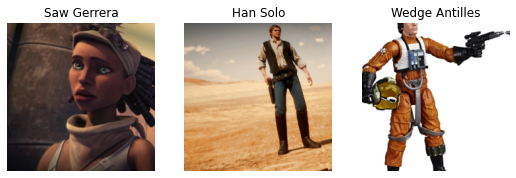

In [8]:
dls.show_batch(nrows=1, ncols=3)

In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0004786300996784121)

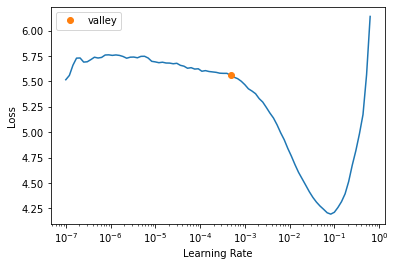

In [10]:
learn.lr_find()

In [11]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,3.926480,1.591708,0.410582,00:25
1,2.235353,1.004217,0.247619,00:24
2,1.578162,0.937212,0.225397,00:25


In [12]:
learn.unfreeze()

SuggestedLRs(valley=9.120108734350652e-05)

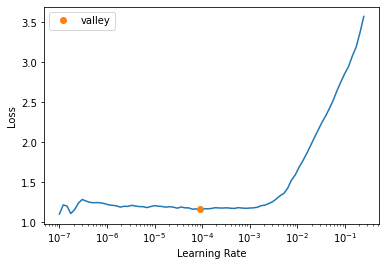

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(12, lr_max=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.198926,0.835446,0.210582,00:24
1,1.014932,0.651015,0.162963,00:25
2,0.784097,0.569757,0.148148,00:31
3,0.558670,0.505865,0.137566,00:25
4,0.411857,0.489966,0.129101,00:25
5,0.320209,0.488330,0.119577,00:25
6,0.246005,0.435030,0.111111,00:25
7,0.189494,0.429962,0.103704,00:25
8,0.151838,0.412382,0.102646,00:26
9,0.122932,0.435075,0.099471,00:25


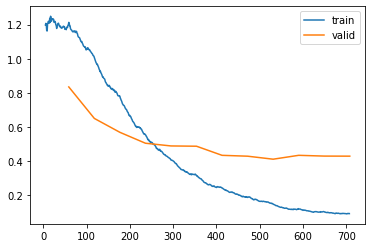

In [17]:
learn.recorder.plot_loss()

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

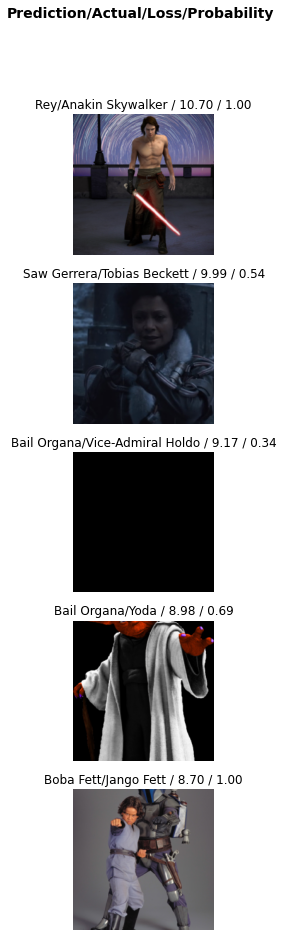

In [20]:
interp.plot_top_losses(5, nrows=5)

In [22]:
learn.export(fname='./star_wars_model_02.pkl', pickle_module=pickle, pickle_protocol=2)